 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True).sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "").astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change().sort_index()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
# sp500_daily_returns.isnull().sum()
sp500_daily_returns.dropna(inplace=True)

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ["SP500"]
sp500_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

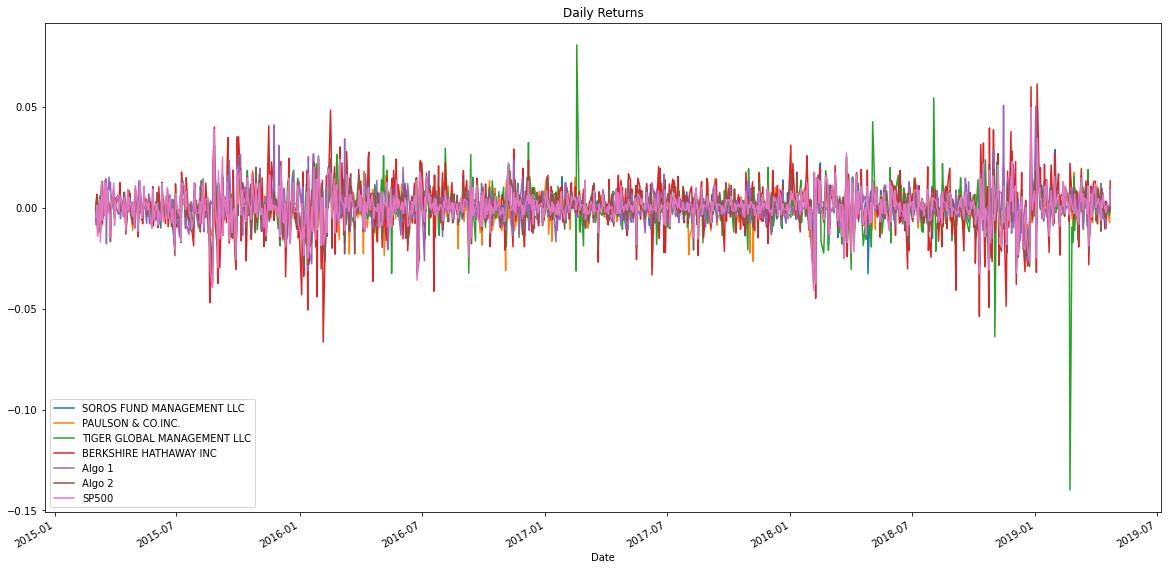

In [17]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

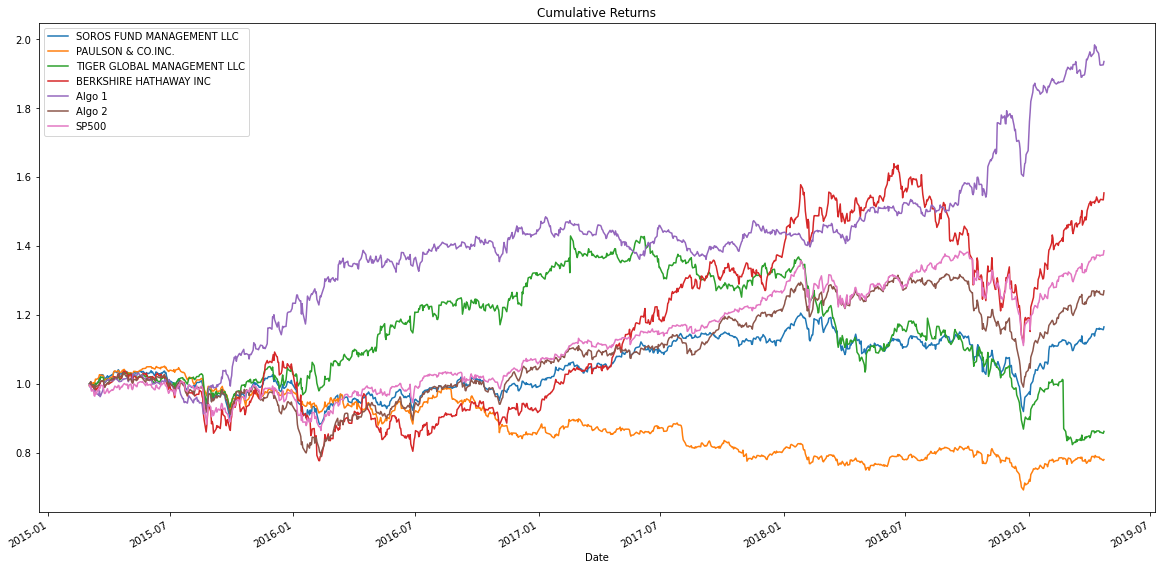

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

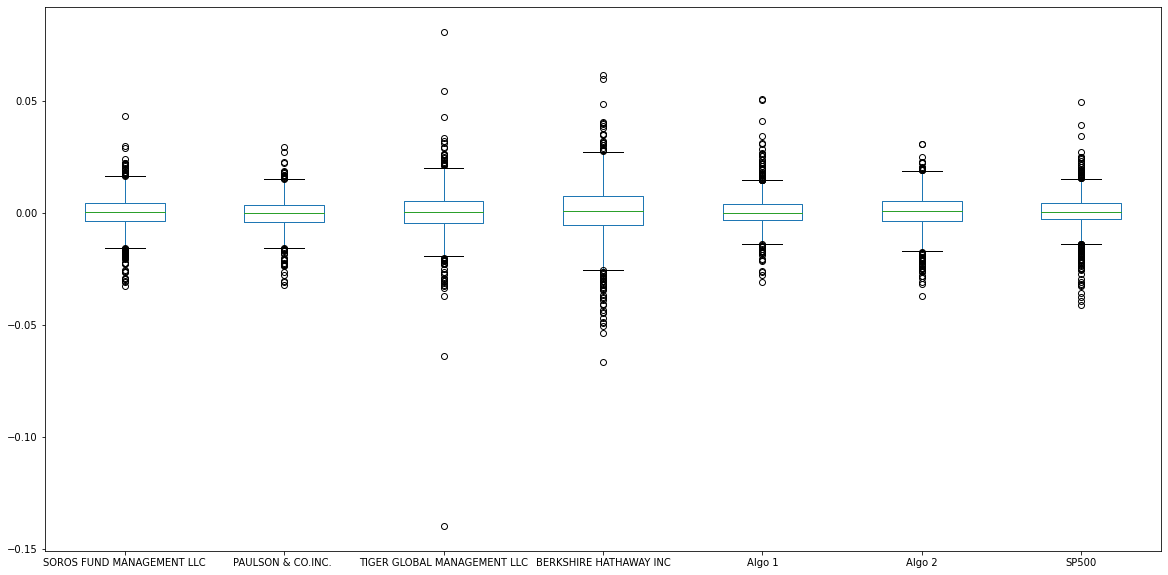

In [19]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,10), grid=False)

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = combined_df.std()
combined_df_std.sort_values(inplace=True)
combined_df_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500                          0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_df_std["SP500"]
# Determine which portfolios are riskier than the S&P 500
riskier_than_sp500 = []
for index, value in combined_df_std.items():
    if value > sp500_std:
        riskier_than_sp500.append(index)
riskier_than_sp500

['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
combined_df_std_annual = combined_df.std() * np.sqrt(252)
combined_df_std_annual.head()

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation, 21 Days'}, xlabel='Date'>

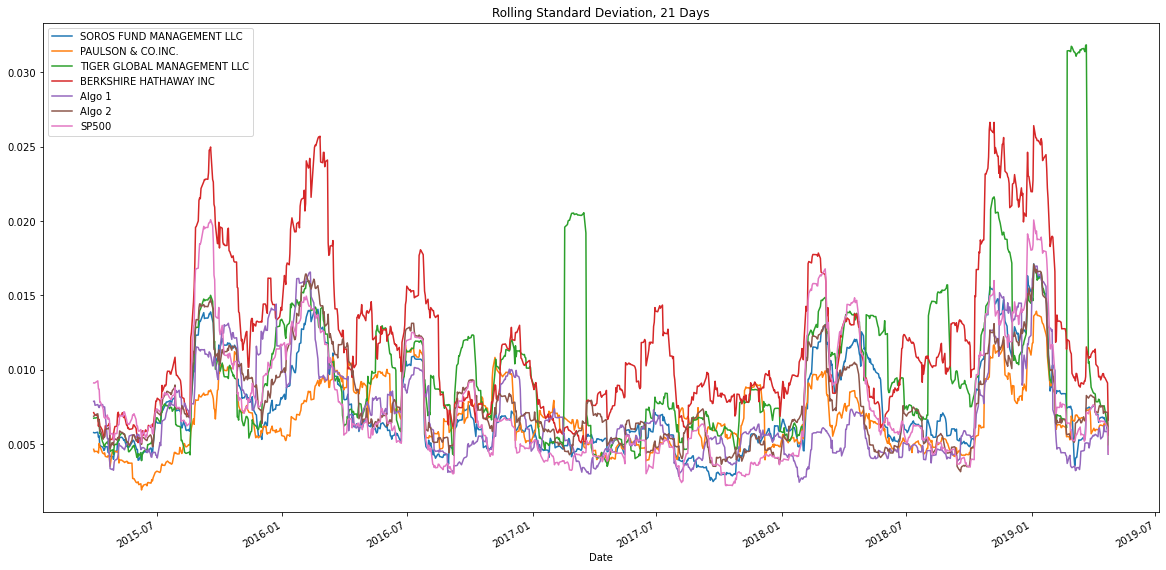

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(20,10), title="Rolling Standard Deviation, 21 Days")

### Calculate and plot the correlation

<AxesSubplot:>

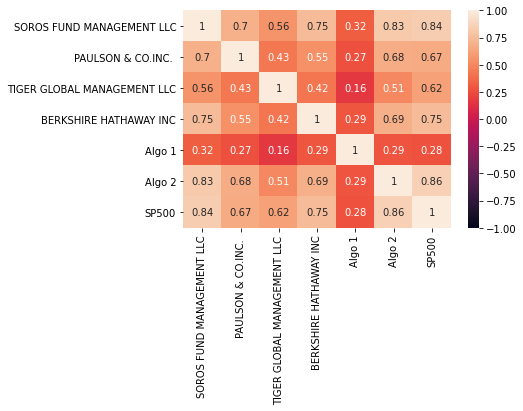

In [25]:
# Calculate the correlation
portfolio_corr = combined_df.corr()
# Display de correlation matrix
sns.heatmap(portfolio_corr, vmax=1, vmin=-1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

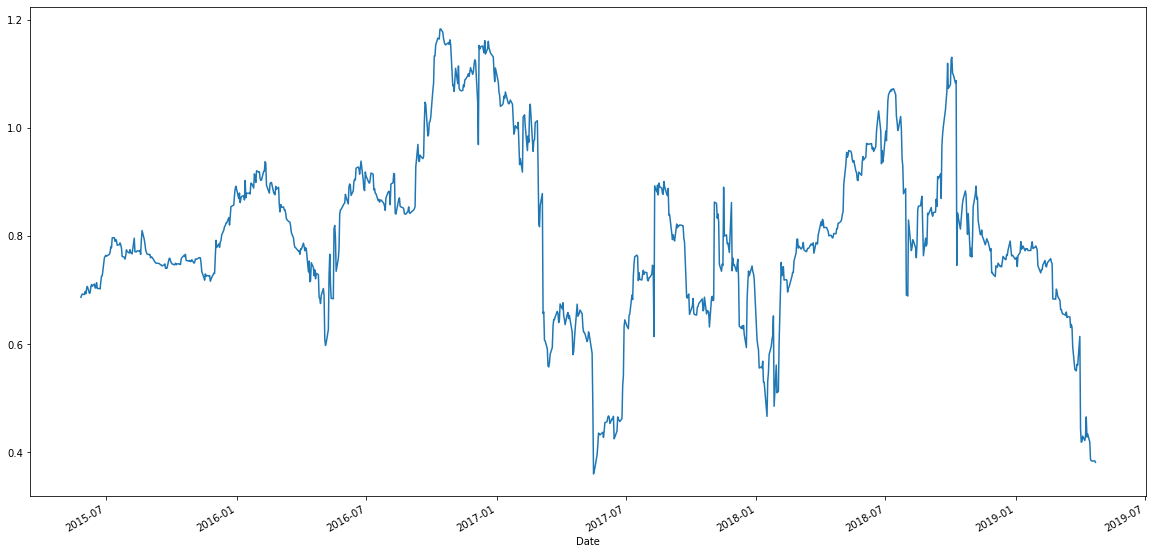

In [26]:
# Calculate covariance of a single portfolio
# 60 DAY ROLLING WINDOW
tiger_covariance = combined_df["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(combined_df["SP500"])
# Calculate variance of S&P 500
sp500_variance = combined_df["SP500"].rolling(window=60).var()
# Computing beta
tiger_beta = tiger_covariance / sp500_variance
# Plot beta trend
tiger_beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

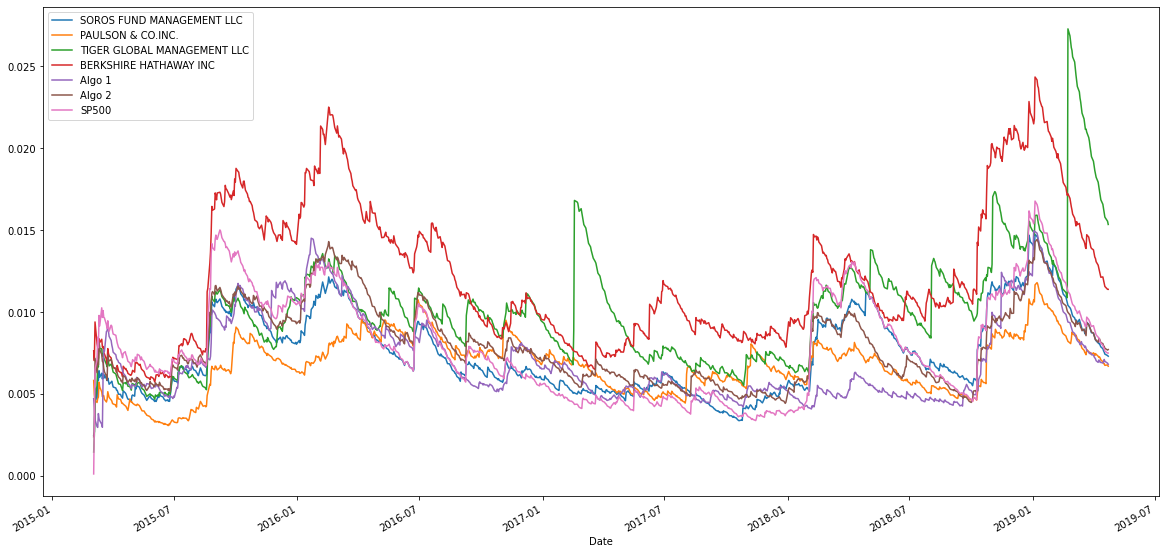

In [43]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife = 21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
SP500                          0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:>

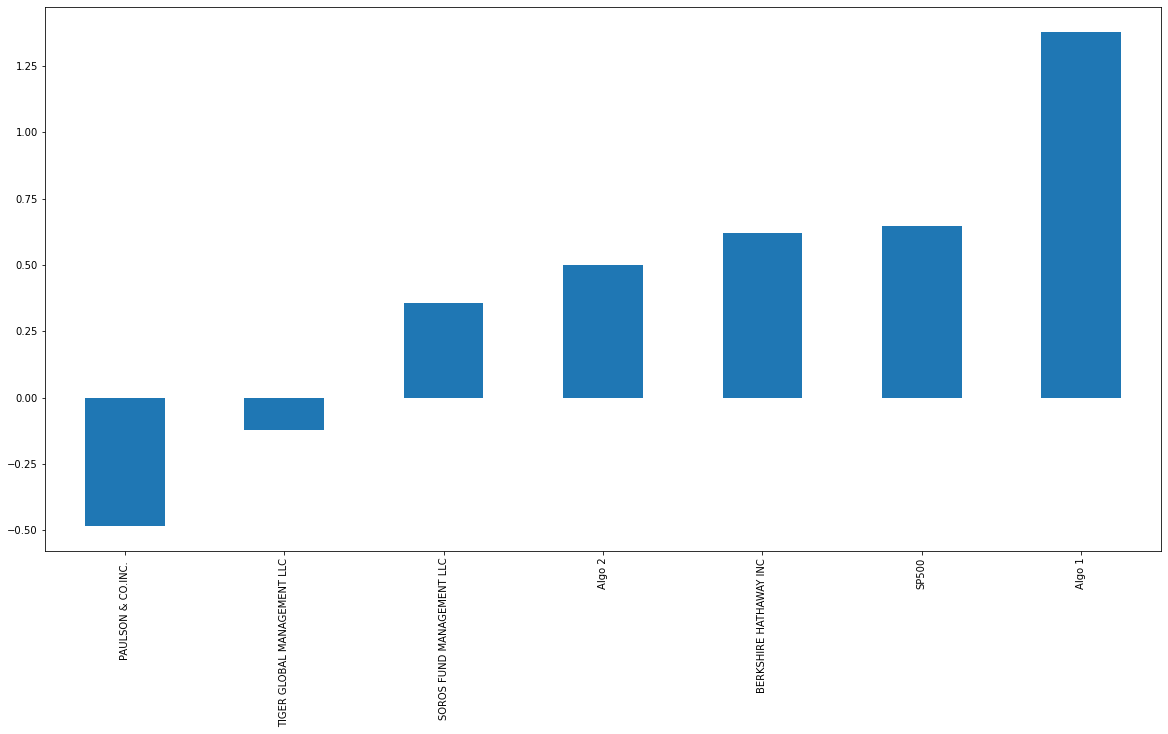

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The algorithmic strategy 1 outperforms both the market and the whale securities, while the algorithmic strategy 2 underperforms against the market and Berkshire Hathaway. While underperformed against the market and Berkshire, the second algorithmic strategy still outperforms the other 3 whale funds at a sharpe ratio of ~0.50

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [30]:
# Reading data from 1st stock
FSR_data = Path("Resources/FSR.csv")
FSR = pd.read_csv(FSR_data, index_col="Date", parse_dates=True, infer_datetime_format=True).sort_index()
FSR.rename(columns={"Close":"FSR"}, inplace=True)
FSR.head()

,FSR
Date,
2018-10-02,9.60
2018-10-03,9.60
2018-10-05,9.63
2018-10-11,9.63
2018-10-12,9.65


In [31]:
# Reading data from 2nd stock
NETE_data = Path("Resources/NETE.csv")
NETE = pd.read_csv(NETE_data, index_col="Date", parse_dates=True, infer_datetime_format=True).sort_index()
NETE.rename(columns={"Close":"NETE"}, inplace=True)
NETE.head()

,NETE
Date,
2018-01-02,13.83
2018-01-03,12.61
2018-01-04,12.05
2018-01-05,11.72
2018-01-08,10.84


In [32]:
# Reading data from 3rd stock
SLB_data = Path("Resources/NETE.csv")
SLB = pd.read_csv(SLB_data, index_col="Date", parse_dates=True, infer_datetime_format=True).sort_index()
SLB.rename(columns={"Close":"SLB"}, inplace=True)
SLB.head()

,SLB
Date,
2018-01-02,13.83
2018-01-03,12.61
2018-01-04,12.05
2018-01-05,11.72
2018-01-08,10.84


In [33]:
# Reading data from 4th stock
VIX_data = Path("Resources/VIX.csv")
VIX = pd.read_csv(VIX_data, index_col="Date", parse_dates=True, infer_datetime_format=True).sort_index()
VIX.rename(columns={"Close":"VIX"}, inplace=True)
VIX.head()

,VIX
Date,
2018-01-02,9.77
2018-01-03,9.15
2018-01-04,9.22
2018-01-05,9.22
2018-01-08,9.52


In [34]:
# Reading data from 5th stock
XBI_data = Path("Resources/NETE.csv")
XBI = pd.read_csv(XBI_data, index_col="Date", parse_dates=True, infer_datetime_format=True).sort_index()
XBI.rename(columns={"Close":"XBI"}, inplace=True)
XBI.head()

,XBI
Date,
2018-01-02,13.83
2018-01-03,12.61
2018-01-04,12.05
2018-01-05,11.72
2018-01-08,10.84


In [35]:
# Combine all stocks in a single DataFrame
combined_portfolio = pd.concat([FSR, NETE, SLB, VIX, XBI], axis="columns", join="inner")
combined_portfolio.head()

,FSR,NETE,SLB,VIX,XBI
Date,,,,,
2018-10-02,9.60,4.75,4.75,12.05,4.75
2018-10-03,9.60,4.68,4.68,11.61,4.68
2018-10-05,9.63,4.64,4.64,14.82,4.64
2018-10-11,9.63,3.77,3.77,24.98,3.77
2018-10-12,9.65,3.84,3.84,21.31,3.84


In [36]:
# Reset Date index
combined_portfolio.sort_index(inplace=True)

In [78]:
# Reorganize portfolio data by having a column per symbol
# already done during loading of csv files

In [37]:
# Calculate daily returns
daily_returns = combined_portfolio.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,FSR,NETE,SLB,VIX,XBI
Date,,,,,
2018-10-03,0.000000,-0.014737,-0.014737,-0.036515,-0.014737
2018-10-05,0.003125,-0.008547,-0.008547,0.276486,-0.008547
2018-10-11,0.000000,-0.187500,-0.187500,0.685560,-0.187500
2018-10-12,0.002077,0.018568,0.018568,-0.146918,0.018568
2018-10-15,0.000000,0.031250,0.031250,-0.000469,0.031250


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
jj_combined = daily_returns.dot(weights)

# Display sample data
jj_combined.head()


Date
2018-10-03   -0.016145
2018-10-05    0.050794
2018-10-11    0.024612
2018-10-12   -0.017828
2018-10-15    0.018656
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
total_portfolio = pd.concat([combined_df, jj_combined], axis="columns", join="inner")
total_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,0
Date,,,,,,,,
2018-10-03,0.002575,0.001456,-0.003772,0.002983,-0.000526,0.006670,0.000711,-0.016145
2018-10-05,-0.010609,-0.004303,-0.000684,-0.015004,-0.003506,-0.007022,-0.005528,0.050794
2018-10-11,-0.012847,-0.013790,-0.027131,0.001485,0.004698,-0.016033,-0.020573,0.024612
2018-10-12,0.010741,0.006281,0.009289,0.031262,0.016796,0.005038,0.014206,-0.017828
2018-10-15,0.001587,0.002778,0.004125,-0.004768,-0.011152,0.001695,-0.005905,0.018656


In [40]:
# Rename the column for my portfolio
total_portfolio.rename(columns={0:"FSR/NETE/SLB/VIX/XBI"}, inplace=True)
total_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,FSR/NETE/SLB/VIX/XBI
Date,,,,,,,,
2018-10-03,0.002575,0.001456,-0.003772,0.002983,-0.000526,0.006670,0.000711,-0.016145
2018-10-05,-0.010609,-0.004303,-0.000684,-0.015004,-0.003506,-0.007022,-0.005528,0.050794
2018-10-11,-0.012847,-0.013790,-0.027131,0.001485,0.004698,-0.016033,-0.020573,0.024612
2018-10-12,0.010741,0.006281,0.009289,0.031262,0.016796,0.005038,0.014206,-0.017828
2018-10-15,0.001587,0.002778,0.004125,-0.004768,-0.011152,0.001695,-0.005905,0.018656


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_portfolio.dropna().sort_index(inplace=True)
total_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,FSR/NETE/SLB/VIX/XBI
Date,,,,,,,,
2018-10-03,0.002575,0.001456,-0.003772,0.002983,-0.000526,0.006670,0.000711,-0.016145
2018-10-05,-0.010609,-0.004303,-0.000684,-0.015004,-0.003506,-0.007022,-0.005528,0.050794
2018-10-11,-0.012847,-0.013790,-0.027131,0.001485,0.004698,-0.016033,-0.020573,0.024612
2018-10-12,0.010741,0.006281,0.009289,0.031262,0.016796,0.005038,0.014206,-0.017828
2018-10-15,0.001587,0.002778,0.004125,-0.004768,-0.011152,0.001695,-0.005905,0.018656


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`
total_portfolio_annualized = total_portfolio.std() * np.sqrt(252)
total_portfolio_annualized.sort_values()
total_portfolio_annualized

SOROS FUND MANAGEMENT LLC      0.177060
PAULSON & CO.INC.              0.142813
TIGER GLOBAL MANAGEMENT LLC    0.290524
BERKSHIRE HATHAWAY INC         0.285995
Algo 1                         0.170023
Algo 2                         0.173998
SP500                          0.197627
FSR/NETE/SLB/VIX/XBI           0.558347
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

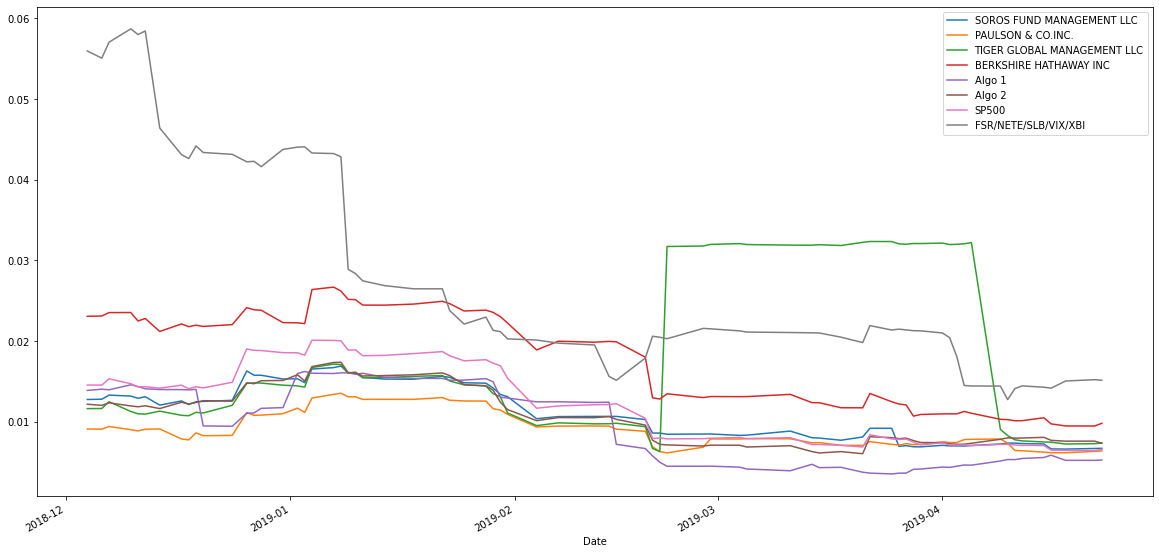

In [119]:
# Calculate rolling standard deviation
rolling_std = total_portfolio.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

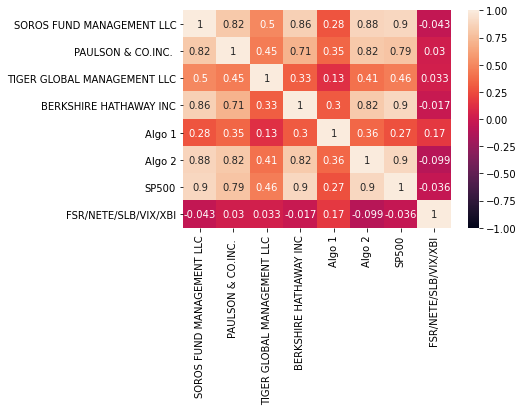

In [121]:
# Calculate and plot the correlation
total_corr = total_portfolio.corr()
sns.heatmap(total_corr, vmax=1, vmin=-1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

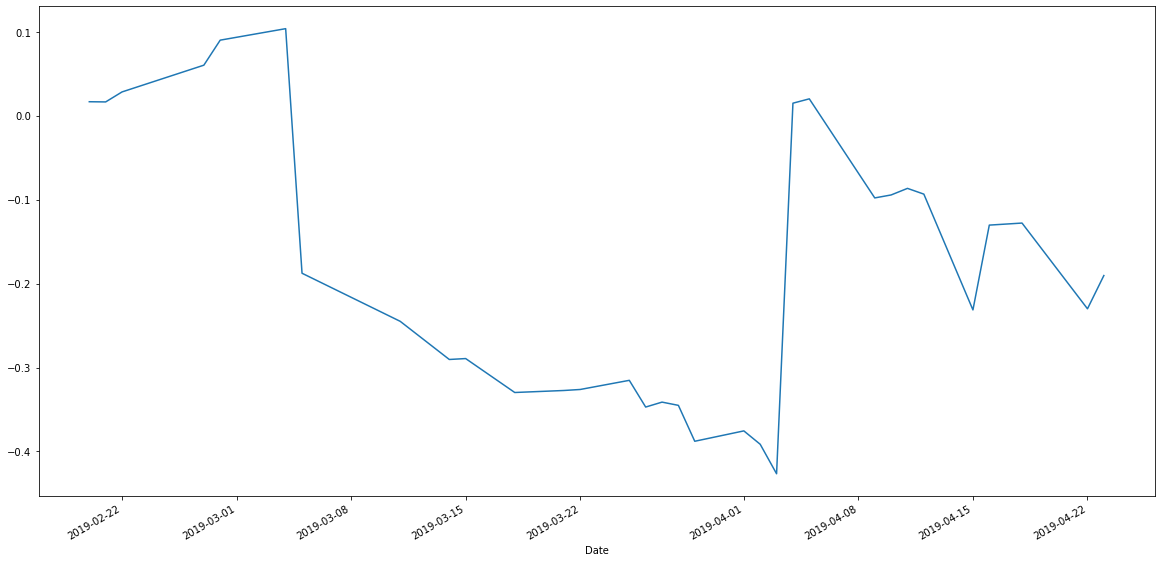

In [122]:
# Calculate and plot Beta
jj_cov = total_portfolio["FSR/NETE/SLB/VIX/XBI"].rolling(window=60).cov(total_portfolio["SP500"])
sp500_60 = total_portfolio["SP500"].rolling(window=60).var()
jj_beta = jj_cov / sp500_60
jj_beta.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [124]:
# Calculate Annualzied Sharpe Ratios
sharpe_total = (total_portfolio.mean() * 252) / (total_portfolio.std() * np.sqrt(252))
sharpe_total.sort_values(inplace=True)
sharpe_total

TIGER GLOBAL MANAGEMENT LLC   -1.328388
PAULSON & CO.INC.              0.011850
SP500                          0.947289
Algo 2                         1.333452
FSR/NETE/SLB/VIX/XBI           1.495118
SOROS FUND MANAGEMENT LLC      1.673836
BERKSHIRE HATHAWAY INC         1.803199
Algo 1                         3.177005
dtype: float64

<AxesSubplot:>

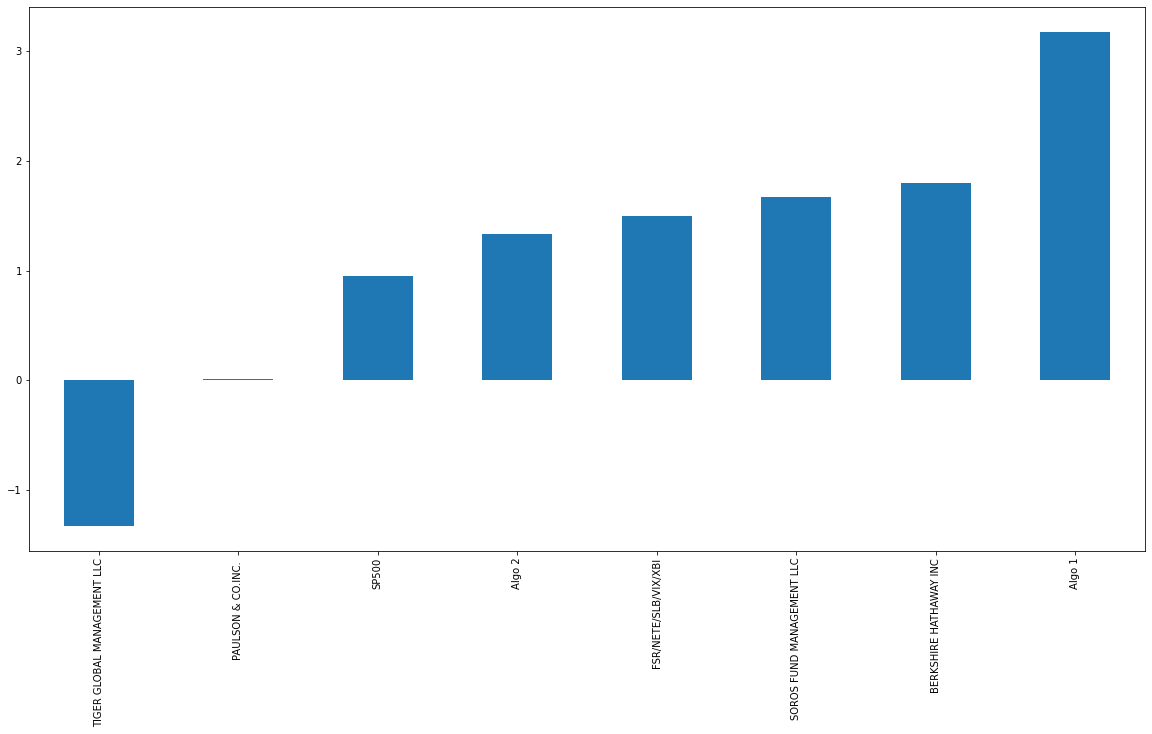

In [128]:
# Visualize the sharpe ratios as a bar plot
sharpe_total.plot(kind="bar", figsize=(20,10))

### How does your portfolio do?

Compared to the market, my portfolio is outperforming with a Sharpe ratio of ~1.5. However, there are 3 securities that are outperforming my portfolio: SOROS, Berkshire, and Algorithmic strategy 1.